# Computing margins around HEALPix pixels

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import healpy as hp

from hipscat.healpix import get_edge, get_margin

Visualize/check the margin computation functions:

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


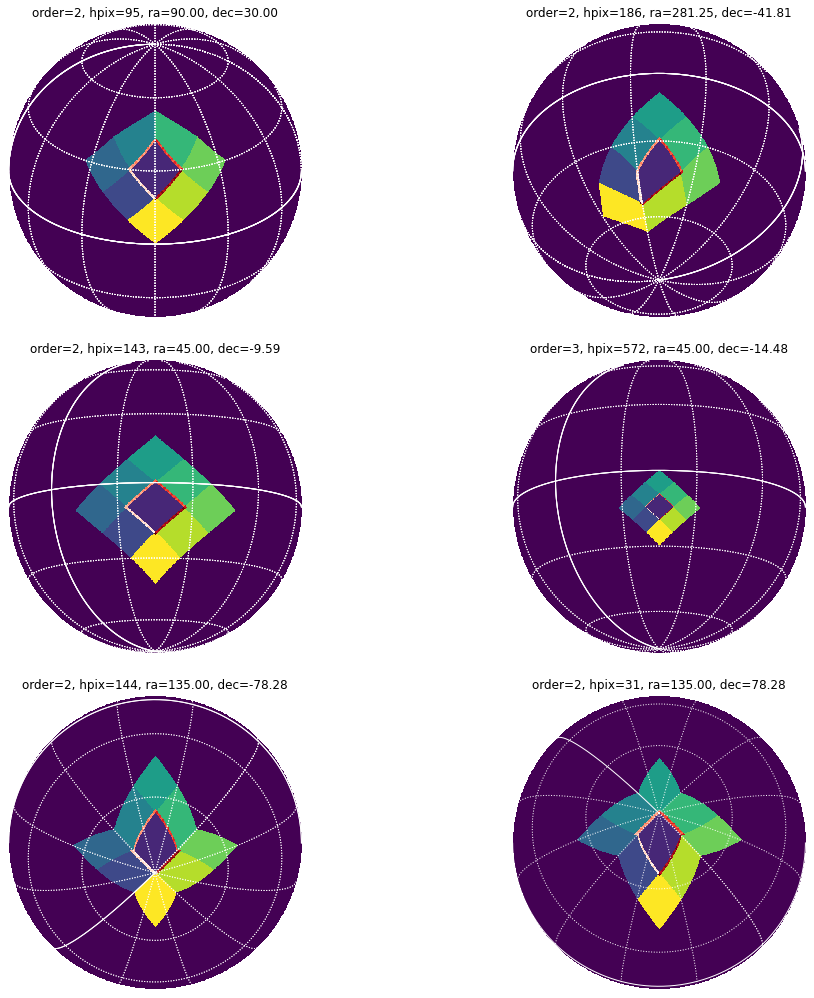

In [3]:
#
# Try it out
#
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,14))
sub0 = 321

for i, (pix, kk, dk) in enumerate([
    (95, 2, 4),  # Seven neighbors
    (186, 2, 4), # Seven neighbors, south
    (143, 2, 4), # vanilla equator
    (572, 3, 5), # vanilla equator, higher order
    (144, 2, 4), # south pole
    (31, 2, 4)   # north pole
]):
    nb = get_margin(kk, pix, dk)
    sub = sub0 + i

    # figure center
    ra, dec = hp.pix2ang(hp.order2nside(kk), pix, nest=True, lonlat=True)

    board = np.zeros(hp.order2npix(kk), dtype=np.float64)
    board[pix] = 1 # the pixel

    # pixel neighbors
    neigh = hp.get_all_neighbours(hp.order2nside(kk), pix, nest=True)
    val = np.arange(len(neigh))+2
    val   = val[neigh != -1]
    neigh = neigh[neigh != -1]
    board[neigh] = val

    # plot
    hp.orthview(board, nest=True, fig=fig, cbar=False, flip='geo', rot=(ra,dec,0), half_sky=True, sub=sub)

    # overplot the margin
    k2 = kk+dk
    board = np.zeros(hp.order2npix(k2), dtype=np.float64)
    board[nb] = np.arange(len(nb))+1

    hp.orthview(board, nest=True, title=f'order={kk}, hpix={pix}, ra={ra:.2f}, dec={dec:.2f}', cmap='Reds', flip='geo', fig=fig, alpha=(board != 0), rot=(ra,dec,0), reuse_axes=True, half_sky=True, cbar=False, sub=sub)
    hp.graticule(c='white')

Some computations used to write the docstrings:

In [4]:
nn = hp.get_all_neighbours(4, 92, nest=True)
print(' '.join(f'{name}={p}' for p, name in zip(nn, 'SW W NW N NE E SE S'.split())))
print(hp.pix2xyf(4, 92, nest=True))

nn = hp.get_all_neighbours(4, 93, nest=True)
print(' '.join(f'{name}={p}' for p, name in zip(nn, 'SW W NW N NE E SE S'.split())))
print(hp.pix2xyf(4, 93, nest=True))

SW=89 W=91 NW=94 N=95 NE=93 E=87 SE=86 S=83
(2, 2, 5)
SW=92 W=94 NW=95 N=26 NE=24 E=18 SE=87 S=86
(3, 2, 5)


In [5]:
nn = hp.get_all_neighbours(4, 5, nest=True)
print(' '.join(f'{name}={p}' for p, name in zip(nn, 'SW W NW N NE E SE S'.split())))
print(hp.pix2xyf(4, 5, nest=True)[2])

nn = hp.get_all_neighbours(4, 26, nest=True)
print(' '.join(f'{name}={p}' for p, name in zip(nn, 'SW W NW N NE E SE S'.split())))
print(hp.pix2xyf(4, 26, nest=True)[2])

SW=4 W=6 NW=7 N=27 NE=26 E=-1 SE=95 S=94
0
SW=95 W=-1 NW=5 N=7 NE=27 E=25 SE=24 S=93
1
